In [4]:
import pandas
import numpy
import sklearn.cross_validation
import sklearn.ensemble
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.metrics
import time 
import datetime
import sklearn.preprocessing
import sklearn.multiclass
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pandas.read_csv('SF_Crime/train.csv')
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
cat_list = ['ARSON','ASSAULT','BAD CHECKS','BRIBERY','BURGLARY','DISORDERLY CONDUCT','DRIVING UNDER THE INFLUENCE','DRUG/NARCOTIC','DRUNKENNESS','EMBEZZLEMENT',
    'EXTORTION','FAMILY OFFENSES','FORGERY/COUNTERFEITING','FRAUD','GAMBLING','KIDNAPPING','LARCENY/THEFT','LIQUOR LAWS','LOITERING','MISSING PERSON',
    'NON-CRIMINAL','OTHER OFFENSES','PORNOGRAPHY/OBSCENE MAT','PROSTITUTION','RECOVERED VEHICLE','ROBBERY','RUNAWAY','SECONDARY CODES','SEX OFFENSES FORCIBLE',
    'SEX OFFENSES NON FORCIBLE','STOLEN PROPERTY','SUICIDE','SUSPICIOUS OCC','TREA','TRESPASS','VANDALISM','VEHICLE THEFT','WARRANTS','WEAPON LAWS']

In [9]:
data.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [11]:
y = numpy.zeros((len(data), len(cat_list)))
print y.shape

(878049L, 39L)


In [14]:
for i in xrange(len(data)):
    y[i, cat_list.index(data.Category[i])] = 1
print y.sum()

878049.0


In [16]:
pred = numpy.zeros((len(data), len(cat_list)))
pred[:, cat_list.index('LARCENY/THEFT')] = 1

In [17]:
print sklearn.metrics.log_loss(y, pred)

27.6589416801


In [ ]:
vals = data.Category.value_counts()
n = len(data)
n_cat = len(cat_list)
pred = numpy.zeros((n, n_cat))
for i in range(n_cat):
    pred[:, i] = vals[cat_list[i]] / float(n)
print sklearn.metrics.log_loss(y, pred)

test_data = pandas.read_csv('SF_Crime/test.csv')
sub_data = test_data[['Id']]
for cat in cat_list:
    sub_data[cat] = vals[cat]/float(n)
sub_data.to_csv('SF_Crime/sub_dummy.csv', index=False, float_format='%.4f')

In [28]:
district_unwrap = pandas.get_dummies(data.PdDistrict, prefix='District')
mod_data = data.join(district_unwrap)

In [29]:
weekDays_unwrap = pandas.get_dummies(data.DayOfWeek, prefix='DayOfWeek')
mod_data = mod_data.join(weekDays_unwrap)

In [30]:
mod_data['DateTime'] = pandas.to_datetime(mod_data.Dates)
mod_data['Year'] = mod_data.DateTime.apply(lambda x: x.year)
mod_data['Hour'] = mod_data.DateTime.apply(lambda x: x.hour)

In [31]:
year_unwrap = pandas.get_dummies(mod_data.Year, prefix='Year')
mod_data = mod_data.join(year_unwrap)

In [32]:
hours_unwrap = pandas.get_dummies(mod_data.Hour, prefix='Hour')
mod_data = mod_data.join(hours_unwrap)

In [33]:
mod_data.drop(['PdDistrict', 'DayOfWeek', 'Dates','DateTime','Hour', 
               'Descript','Resolution', 'Category'], axis=1, inplace=True)

In [35]:
print mod_data.columns

Index([u'Address', u'X', u'Y', u'District_BAYVIEW', u'District_CENTRAL',
       u'District_INGLESIDE', u'District_MISSION', u'District_NORTHERN',
       u'District_PARK', u'District_RICHMOND', u'District_SOUTHERN',
       u'District_TARAVAL', u'District_TENDERLOIN', u'DayOfWeek_Friday',
       u'DayOfWeek_Monday', u'DayOfWeek_Saturday', u'DayOfWeek_Sunday',
       u'DayOfWeek_Thursday', u'DayOfWeek_Tuesday', u'DayOfWeek_Wednesday',
       u'Year', u'Year_2003', u'Year_2004', u'Year_2005', u'Year_2006',
       u'Year_2007', u'Year_2008', u'Year_2009', u'Year_2010', u'Year_2011',
       u'Year_2012', u'Year_2013', u'Year_2014', u'Year_2015', u'Hour_0',
       u'Hour_1', u'Hour_2', u'Hour_3', u'Hour_4', u'Hour_5', u'Hour_6',
       u'Hour_7', u'Hour_8', u'Hour_9', u'Hour_10', u'Hour_11', u'Hour_12',
       u'Hour_13', u'Hour_14', u'Hour_15', u'Hour_16', u'Hour_17', u'Hour_18',
       u'Hour_19', u'Hour_20', u'Hour_21', u'Hour_22', u'Hour_23'],
      dtype='object')


In [36]:
hours = range(24)
y_1 = y[:,cat_list.index('LARCENY/THEFT')]
y_2 = y[:,cat_list.index('ASSAULT')]
y_3 = y[:,cat_list.index('DRUG/NARCOTIC')]

In [110]:
res_1 = [(mod_data.ix[:,'Hour_%d'%x] * y_1).sum()/float(mod_data.ix[:,'Hour_%d'%x].sum()) for x in hours]
res_2 = [(mod_data.ix[:,'Hour_%d'%x] * y_2).sum()/float(mod_data.ix[:,'Hour_%d'%x].sum()) for x in hours]
res_3 = [(mod_data.ix[:,'Hour_%d'%x] * y_3).sum()/float(mod_data.ix[:,'Hour_%d'%x].sum()) for x in hours]

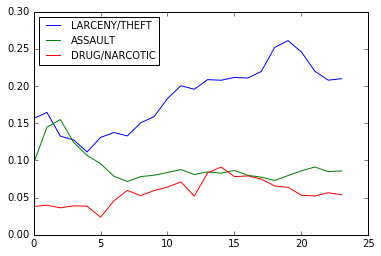

In [111]:
plt.plot(hours,res_1,'b')
plt.plot(hours,res_2,'g')
plt.plot(hours,res_3,'r')
plt.legend(['LARCENY/THEFT','ASSAULT','DRUG/NARCOTIC'],loc='top left',fontsize='medium')

In [108]:
years = range(2003,2016)
res_y1 = [(mod_data.ix[:,'Year_%d'%x] * y_1).sum()/float(mod_data.ix[:,'Year_%d'%x].sum()) for x in years]
res_y2 = [(mod_data.ix[:,'Year_%d'%x] * y_2).sum()/float(mod_data.ix[:,'Year_%d'%x].sum()) for x in years]
res_y3 = [(mod_data.ix[:,'Year_%d'%x] * y_3).sum()/float(mod_data.ix[:,'Year_%d'%x].sum()) for x in years]

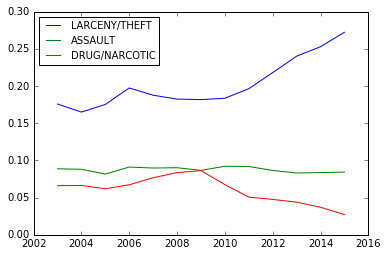

In [109]:
plt.plot(years,res_y1, 'b')
plt.plot(years,res_y2, 'g')
plt.plot(years,res_y3, 'r')
plt.legend(['LARCENY/THEFT','ASSAULT','DRUG/NARCOTIC'],loc='top left',fontsize='medium')

In [112]:
districts = data.PdDistrict.unique()
res_d1 = [(mod_data.ix[:,'District_%s'%x] * y_1).sum()/float(mod_data.ix[:,'District_%s'%x].sum()) for x in districts]
res_d2 = [(mod_data.ix[:,'District_%s'%x] * y_2).sum()/float(mod_data.ix[:,'District_%s'%x].sum()) for x in districts]
res_d3 = [(mod_data.ix[:,'District_%s'%x] * y_3).sum()/float(mod_data.ix[:,'District_%s'%x].sum()) for x in districts]

([<matplotlib.axis.XTick at 0x75b0e240>,
 <a list of 10 Text xticklabel objects>)

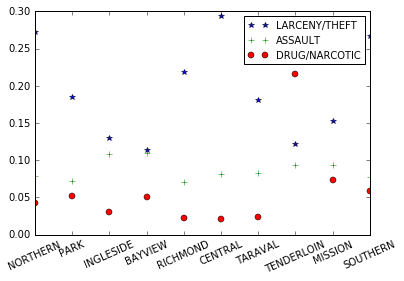

In [113]:
plt.plot(res_d1, 'b*')
plt.plot(res_d2, 'g+')
plt.plot(res_d3, 'ro')
plt.legend(['LARCENY/THEFT','ASSAULT','DRUG/NARCOTIC'],loc='top left',fontsize='medium')
plt.xticks(numpy.arange(10), districts, rotation=24)

In [19]:
mod_data.drop(['Address'], axis=1, inplace=True)

x_mean = data.X.mean()
y_mean = data.Y.mean()
x_std = data.X.std()
y_std = data.Y.std()

mod_data.X = (data.X - x_mean) / x_std
mod_data.Y = (data.Y - y_mean) / y_std

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(mod_data, y,
                                      test_size=0.3,
                                      random_state=0)

In [ ]:
clf_LR = sklearn.linear_model.LogisticRegression(penalty='l2', C=0.01, random_state=0)
OVR = sklearn.multiclass.OneVsRestClassifier(clf_LR, n_jobs=-2)

Cset = numpy.logspace(-5, 4, 20)
scores = []
for c in Cset:
    clf_LR.C = c
    OVR.fit(X_train, y_train)
    pred = OVR.predict_proba(X_test)
    score = sklearn.metrics.log_loss(y_test, pred)
    print score
    scores.append(score)

In [ ]:
clf_GD = sklearn.ensemble.GradientBoostingClassifier(random_state=0, max_depth=3)
clf_GD.n_estimators = 10
clf_GD.verbose = True
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(mod_data, y,
                                      test_size=0.3,
                                      random_state=0)

OVR_GD = sklearn.multiclass.OneVsRestClassifier(clf_GD)

starttime = datetime.datetime.now()
OVR_GD.fit(X_train, y_train)
print 'Time elapsed:', datetime.datetime.now() - starttime
pred = OVR_GD.predict_proba(X_test)
print sklearn.metrics.log_loss(y_test, pred)

pred = OVR.predict_proba(mod_test_data)
sub_data = test_data[['Id']]
for i, cat in enumerate(cat_list):
    sub_data[cat] = pred[:,i]
sub_data.to_csv('SF_Crime/sub_GD.csv', index=False, float_format='%.4f')

In [ ]:
clf_LR.C = 100
OVR.fit(mod_data, y)

mod_test_data = test_data.copy()
district_unwrap = pandas.get_dummies(mod_test_data.PdDistrict, prefix='District')
mod_test_data = mod_test_data.join(district_unwrap)
print 'done pd'

weekDays_unwrap = pandas.get_dummies(mod_test_data.DayOfWeek, prefix='DayOfWeek')
mod_test_data = mod_test_data.join(weekDays_unwrap)
print 'done weekdays'

mod_test_data['DateTime'] = pandas.to_datetime(mod_test_data.Dates)
mod_test_data['Year'] = mod_test_data.DateTime.apply(lambda x: x.year)
mod_test_data['Hour'] = mod_test_data.DateTime.apply(lambda x: x.hour)

year_unwrap = pandas.get_dummies(mod_test_data.Year, prefix='Year')
mod_test_data = mod_test_data.join(year_unwrap)
print 'done years'

hours_unwrap = pandas.get_dummies(mod_test_data.Hour, prefix='Hour')
mod_test_data = mod_test_data.join(hours_unwrap)
print 'done hours'

mod_test_data.X = (test_data.X - x_mean) / x_std
mod_test_data.Y = (test_data.Y - y_mean) / y_std

mod_test_data.drop([u'Id', u'Dates', u'DayOfWeek', u'PdDistrict', u'Address', u'DateTime', u'Year', u'Hour'], axis=1, inplace=True)

pred = OVR.predict_proba(mod_test_data)
sub_data = test_data[['Id']]
for i, cat in enumerate(cat_list):
    sub_data[cat] = pred[:,i]
sub_data.to_csv('SF_Crime/sub_LR.csv', index=False, float_format='%.4f')

In [ ]:
import sklearn.neighbors
clf_KN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=100, weights='distance')
OVR_KN = sklearn.multiclass.OneVsRestClassifier(clf_KN)

In [ ]:
starttime = datetime.datetime.now()
kn_data = data[['X','Y']]
kn_y = y
OVR_KN.fit(kn_data, kn_y)
print 'Time elapsed:', datetime.datetime.now() - starttime

In [ ]:
kn_test = data[['X','Y']][:1000]
starttime = datetime.datetime.now()
OVR_KN.predict_proba(kn_test)
print 'Time elapsed:', datetime.datetime.now() - starttime

In [ ]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(kn_data, y,
                                      test_size=0.3,
                                      random_state=0)
OVR_KN.fit(X_train, y_train)
pred = OVR_KN.predict_proba(X_test)
sklearn.metrics.log_loss(y_test, pred)